<a href="https://colab.research.google.com/github/chaitanya-949/Netflix-Tvshows-and-movies-clustering/blob/main/NETFLIX_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 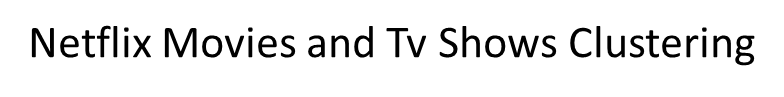



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

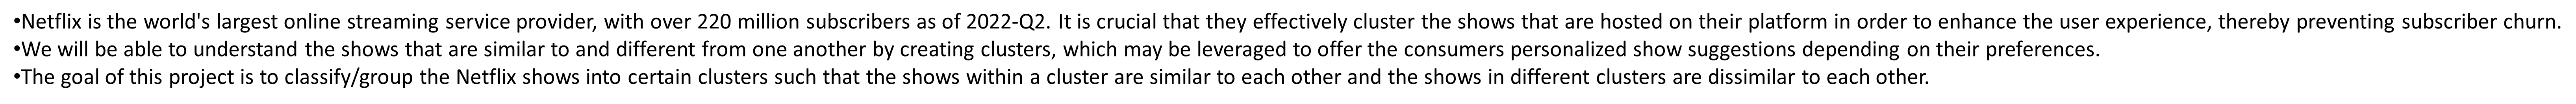

# **GitHub Link -**

https://github.com/chaitanya-949/hawkeye/blob/main/NETFLIX_ML_Submission_Template.ipynb

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import missingno as msno


# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Total rows and columns for netflix: {netflix_df.shape}')

Total rows and columns for netflix: (7787, 12)


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'duplicated values in netflix_df: {netflix_df.duplicated().sum()}')

duplicated values in netflix_df: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

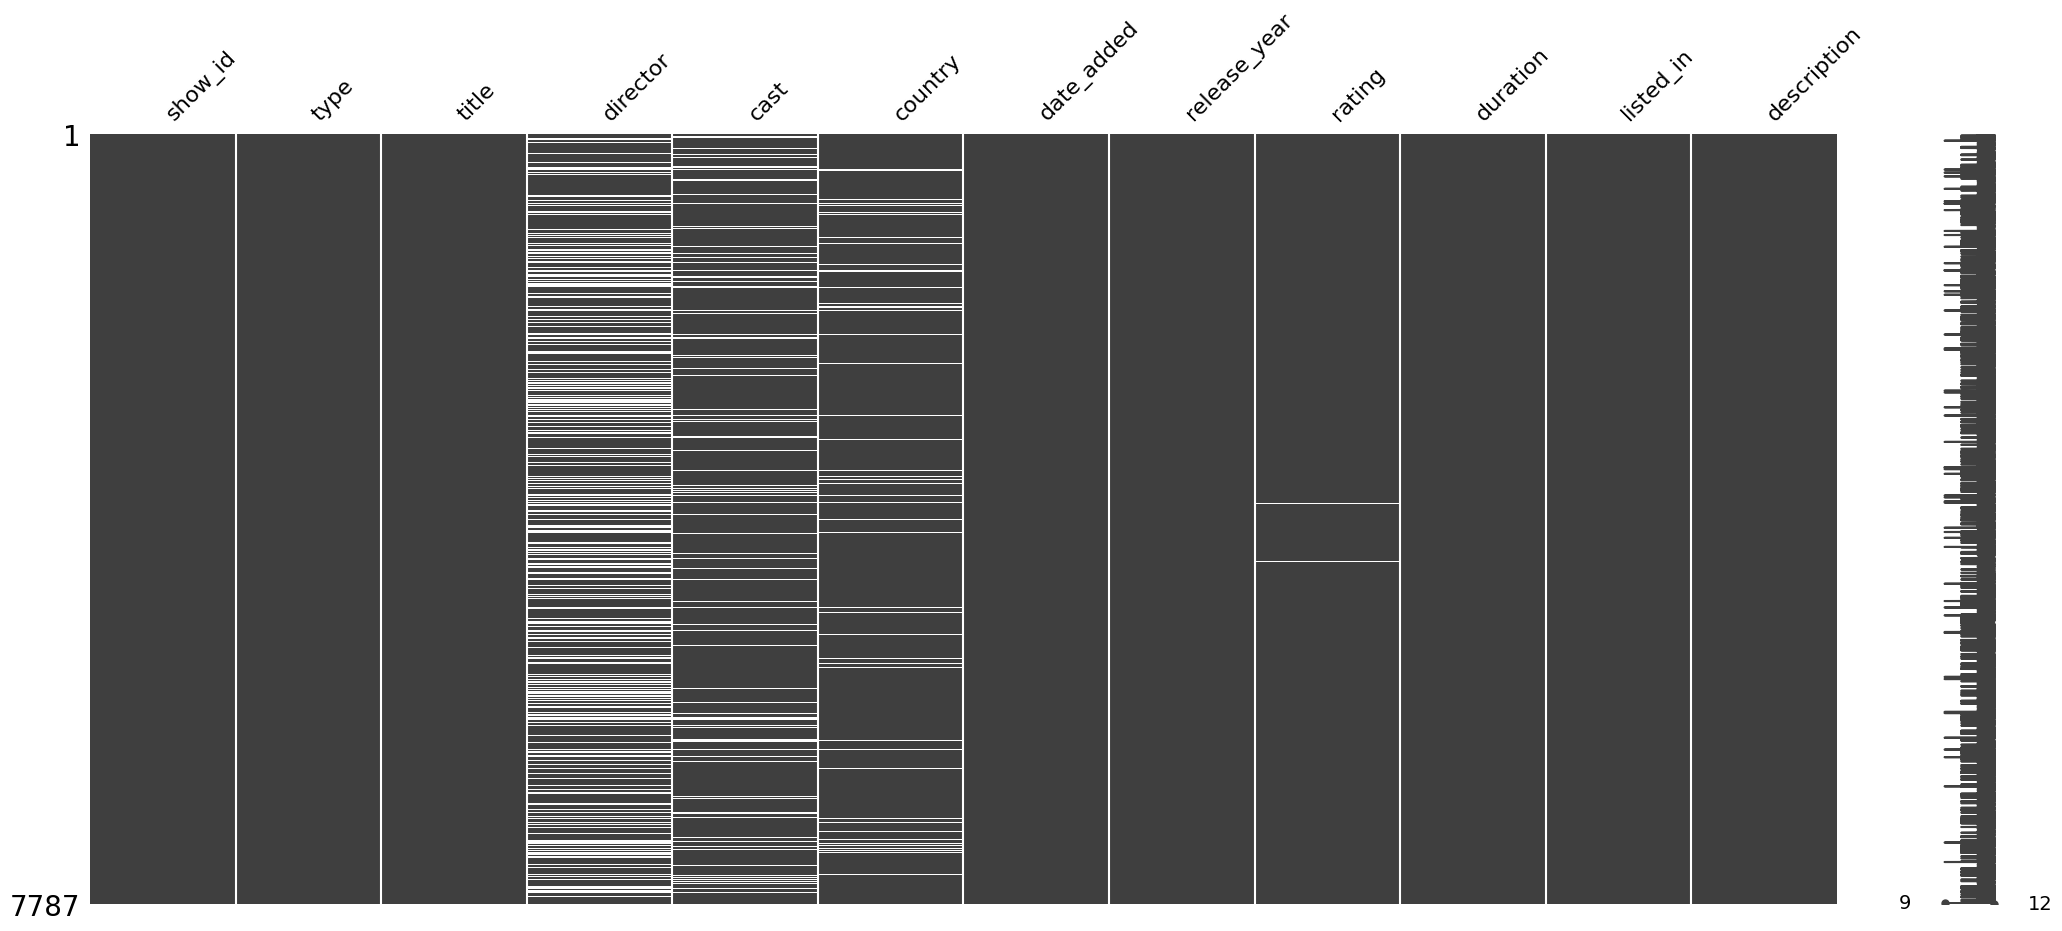

In [ ]:
# Visualizing the missing values
msno.matrix(netflix_df)

### What did you know about your dataset?

There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

show_id : Unique ID for every Movie/Show

type : Identifier - Movie/Show

title : Title of the Movie/Show

director : Director of the Movie/Show

cast : Actors involved in the Movie/Show

country : Country where the Movie/Show was produced

date_added : Date it was added on Netflix

release_year : Actual Release year of the Movie/Show

rating : TV Rating of the Movie/Show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description : The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_unique_values = netflix_df.nunique()
print(netflix_unique_values)

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

In [ ]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
import plotly.express as px

# Sample categorical data (replace with your own data)
categories = netflix_df['type']

# Create countplot using Plotly
fig = px.histogram(categories, x=categories, nbins=len(set(categories)))

# Set x-axis label and title
fig.update_layout(xaxis_title='Categories', yaxis_title='Count', title='Countplot of Categories')

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

i did a countplot for the type column to see the which category has more in number

##### 2. What is/are the insight(s) found from the chart?

i see movies are more in number with 5377 count and tv shows with 2410

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

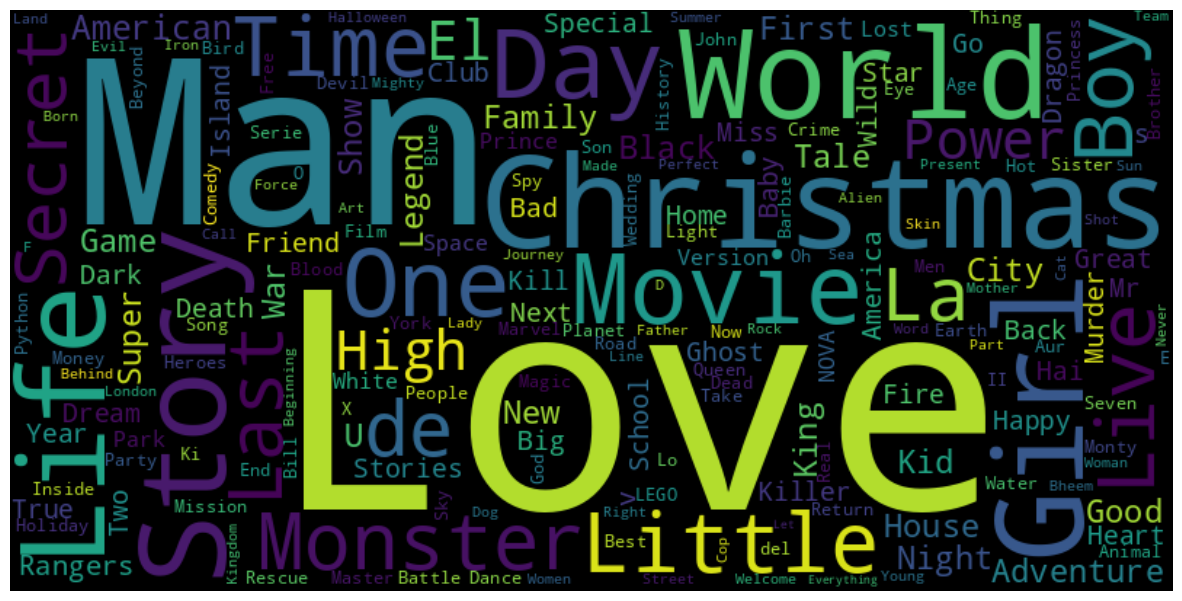

In [ ]:
# Chart - 2 visualization code
# Creating word cloud for title.
plt.figure(figsize=(15,8))
text = " ".join(word for word in netflix_df['title'])
# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(stopwords=STOPWORDS,width = 800, height = 400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

i have created a word cloud for the title column

##### 2. What is/are the insight(s) found from the chart?

in this i found there is a high frquency in words like world,man,love,girl,christmas.

#### Chart - 3
column:Director

In [ ]:
# Chart - 3 visualization code
print(f"Number of Tv shows directed by directors are : { netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of Movies directed by directors are : { netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")

Number of Tv shows directed by directors are : 184
Number of Movies directed by directors are : 5214


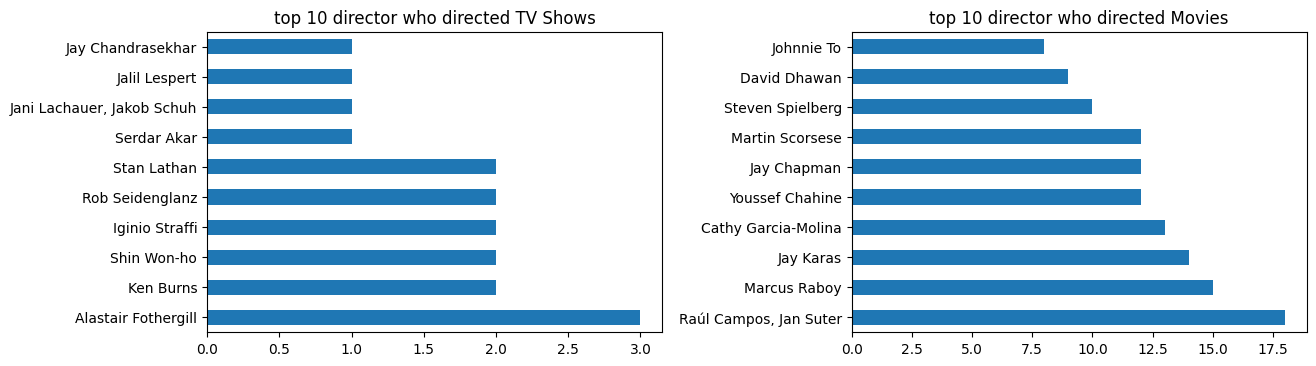

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,4))

# top 10 directors who directed TV shows
tv_shows = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows')

# top 10 directors who directed Movies
movies = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Number of Movies directed by directors are : 184

Number of TV shows directed by directors are : 5214

The three shows directed by Alastair Fothergill are the highest on the data list.
Jan Suter,Raul Campos have directed 18 films, more than anyone else in the dataset.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
print(f"Number of TV Shows actors: {len(netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


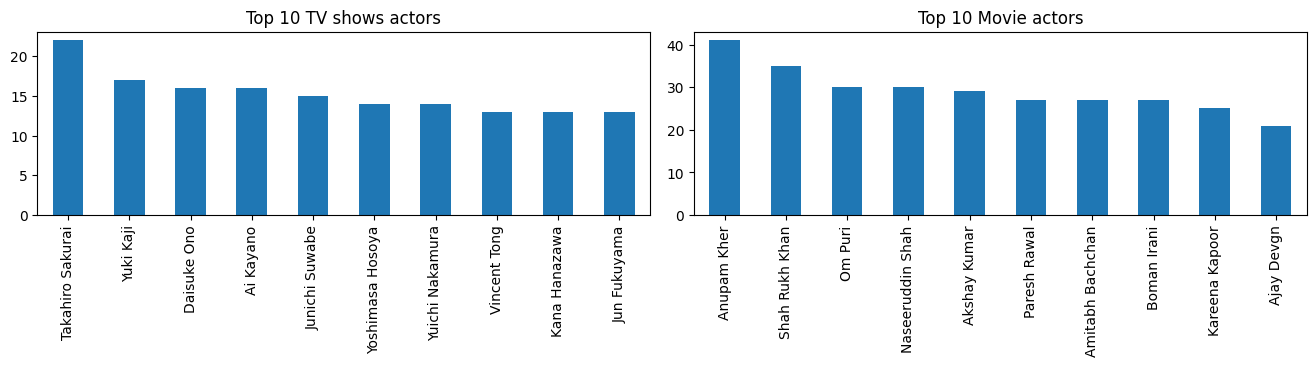

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='bar', ax=ax[0])
a.set_title('Top 10 TV shows actors')

# seperating movie actor from cast column
top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='bar', ax=ax[1])
b.set_title('Top 10 Movie actors')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Number of TV Shows actors: 13585

Number of Movies actors: 23049

The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.

In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### Chart - 5

<Axes: >

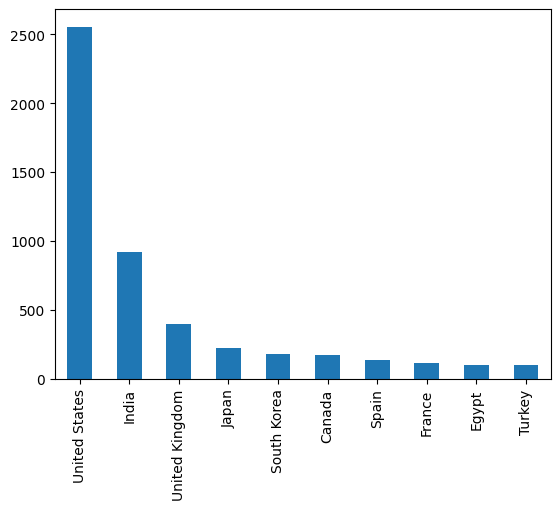

In [ ]:
# Chart - 5 visualization code
# univariate analysis
netflix_df['country'].value_counts().nlargest(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

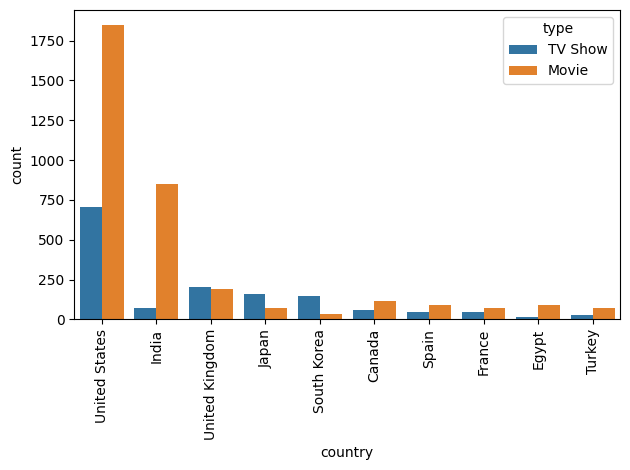

In [ ]:
# Chart - 6 visualization code
# bivariate analysis
graph = sns.countplot(x="country", data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In India and United State, a greater number of movies are present compared to TV shows.

In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

#### Chart - 7

In [ ]:

# Univariate analysis
hist_fig = px.histogram(netflix_df, x="release_year", title="Distribution by released year")

# Bivariate analysis
count_fig = px.histogram(netflix_df, x="release_year", color="type",
                         title="Movie/TV shows released in top 15 years",
                         category_orders={"release_year": netflix_df["release_year"].value_counts().index[:15]},
                         barmode="group")

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution by released year", "Movie/TV shows released in  years"))

# Add histograms to the subplots
fig.add_trace(hist_fig.data[0], row=1, col=1)
fig.add_trace(count_fig.data[0], row=1, col=2)
fig.add_trace(count_fig.data[1], row=1, col=2)

# Update layout
fig.update_layout(height=500, width=2000, showlegend=False)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Netflix starts releasing more Movies/TV shows in recent years compared to old ones.

Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


# Univariate analysis
univariate_fig = px.histogram(netflix_df, x="rating",
                              title="Top 10 rating given for movies and TV shows",
                              category_orders={"rating": netflix_df["rating"].value_counts().index[:10]})

# Bivariate analysis
bivariate_fig = px.histogram(netflix_df, x="rating", color="type",
                             title="Top 10 rating given for movies and TV shows",
                             category_orders={"rating": netflix_df["rating"].value_counts().index[:10]},
                             barmode="group")

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Univariate analysis", "Bivariate analysis"))

# Add histograms to the subplots
for trace in univariate_fig.data:
    fig.add_trace(trace, row=1, col=1)

for trace in bivariate_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(height=500, width=1500, showlegend=True)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."

When compared to TV shows, Movies receive the highest rating as we saw earlier in the type column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Top 10 genres
top_fig = px.bar(genres[:10], x='genre', y='count', title='Top 10 genres present in Netflix')
top_fig.update_layout(xaxis_tickangle=180)

# Last 10 genres
bottom_fig = px.bar(genres[-10:], x='genre', y='count', title='Last 10 genres present in Netflix')
bottom_fig.update_layout(xaxis_tickangle=90)

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 10 genres', 'Last 10 genres'))

# Add bar plots to the subplots
for trace in top_fig.data:
    fig.add_trace(trace, row=1, col=1)

for trace in bottom_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(height=500, width=1500)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

International Movies, Dramas, and Comedies make up the majority of the genres.

Tv horror,Teen shows,Cult movies are stand last in the genres.

#### Chart - 10

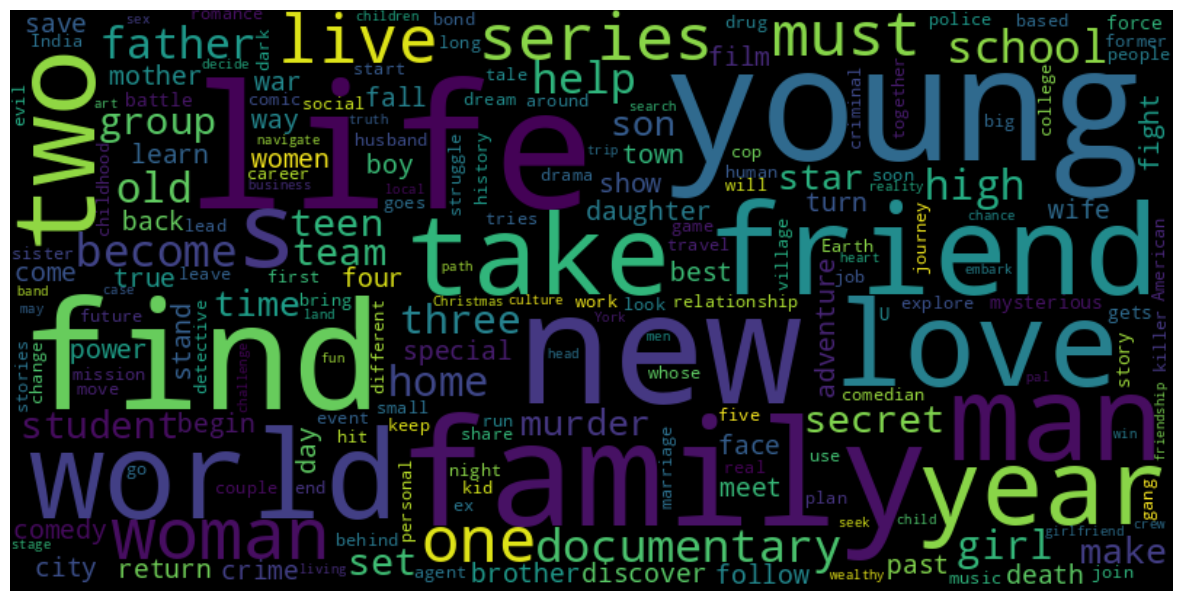

In [ ]:
# Chart - 10 visualization code
# Creating word cloud for description column.
plt.figure(figsize=(15,8))
text = " ".join(word for word in netflix_df['description'])
# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(stopwords=STOPWORDS,width = 800, height = 400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The most frequently used words in the description column are young,life,friend,new,find etc

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The "empty string" can be used to replace the missing values in the director, cast, and country attributes.

and in other columns if there are null values i dropped them

### 2. Handling Outliers

<Axes: >

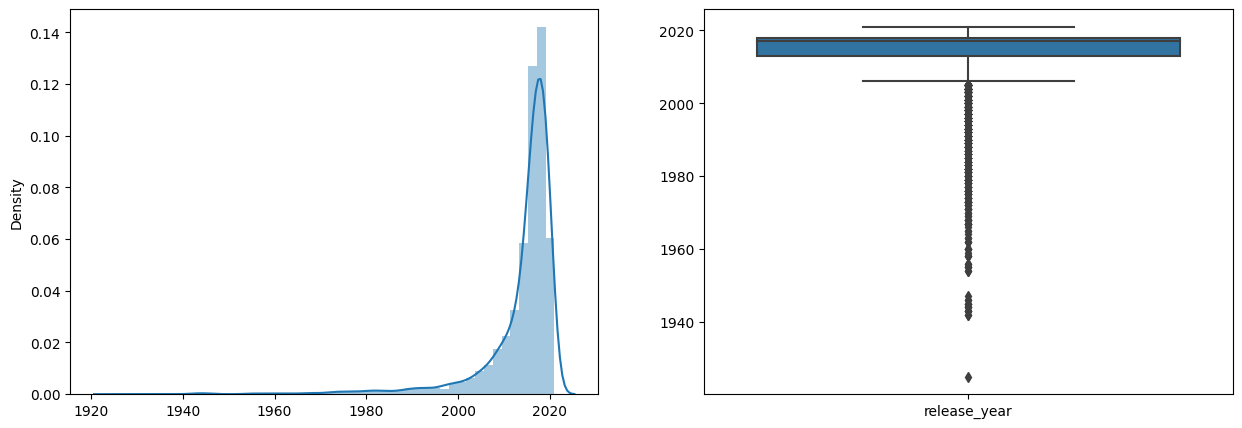

In [ ]:
# Handling Outliers & Outlier treatments
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=netflix_df, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Except for the release year, almost all of the data are presented in text format.

The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# creating tags column using all text column which one is used for model building purpose.
netflix_df['text_data'] = netflix_df['director'] + netflix_df['cast'] + netflix_df['country'] + netflix_df['rating'] + netflix_df['listed_in'] + netflix_df['description']

In [ ]:
netflix_df['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

I have added Director,cast,country,rating,listed_in,description columns together and made a new column text data

In [ ]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [ ]:

# applying stopwords function.
netflix_df['text_data'] = netflix_df['text_data'].apply(stopwords)

In [ ]:
netflix_df['text_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

#### 3. Removing Punctuations

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:

netflix_df['text_data'] = netflix_df['text_data'].apply(remove_punctuation)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
netflix_df['text_data'][0]


'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


# appying stemming function
netflix_df['text_data'] = netflix_df['text_data'].apply(stemming)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

#### 10. Text Vectorization

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 5000)   # max features = 5000 taking long time to process

# fit the vectorizer using the text data
tfidf.fit(netflix_df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary))

5000


In [ ]:
vector = tfidf.transform(netflix_df['text_data']).toarray()
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

I have used TFIDF vectorization which stands for Term Frequency Inverse Document Frequency

The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
from sklearn.decomposition import PCA






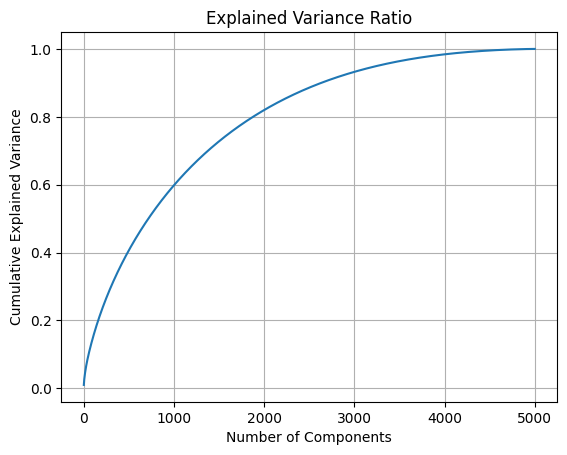

In [ ]:
# Instantiate PCA without specifying the number of components
pca = PCA(random_state=42)

# Fit the PCA model to your data
pca.fit(vector)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

3000 components alone account for more than 80% of the variance.
Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [ ]:
# Create an instance of PCA
pca = PCA(n_components=3000,random_state=42)  # Specify the number of components (dimensions) to reduce

# Reshape the vector to a 2D array if needed
if len(vector.shape) == 1:
    vector = np.reshape(vector, (1, -1))

# Apply PCA to the vector
reduced_vector = pca.fit_transform(vector)

# Print the reduced vector
print(reduced_vector)

[[ 0.18159904 -0.00677905 -0.00611975 ...  0.01033096  0.00471248
   0.00253256]
 [-0.04491004  0.01660095  0.01885794 ... -0.01164058 -0.00849273
  -0.00053916]
 [-0.04695241  0.02754885 -0.055225   ...  0.00496709  0.0117574
  -0.00449258]
 ...
 [-0.07661893  0.00873557  0.10938351 ... -0.00800508 -0.00236694
   0.00059477]
 [ 0.06100862 -0.03424053  0.03690564 ... -0.00251778  0.01245835
  -0.00968908]
 [-0.07672455 -0.14404377  0.19834075 ... -0.00582182 -0.00195544
  -0.00062801]]


In [ ]:
reduced_vector.shape

(7770, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA which stands for principle component analysis to reduce the dimensionality of data.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
wcss_list= []  #Initializing the list for the values of WCSS
wcss_dict = {}
#Using for loop for iterations from 1 to 10.
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(reduced_vector)
    wcss_list.append(kmeans.inertia_)
    wcss_dict[i] = kmeans.inertia_

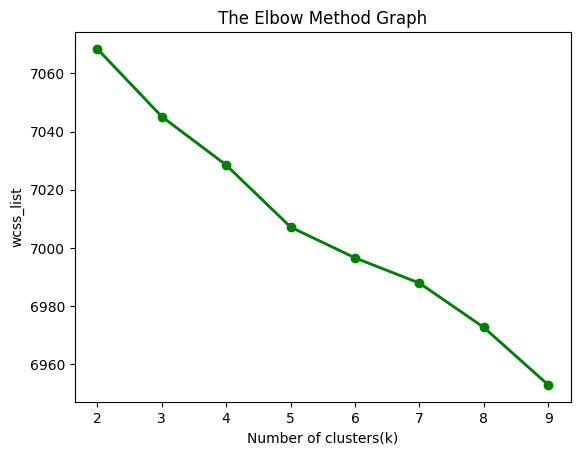

In [ ]:
# plot for sum of squared distance for each number of cluster
plt.plot(range(2,10), wcss_list)
plt.plot(range(2,10),wcss_list, linewidth=2, color="green", marker ="o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

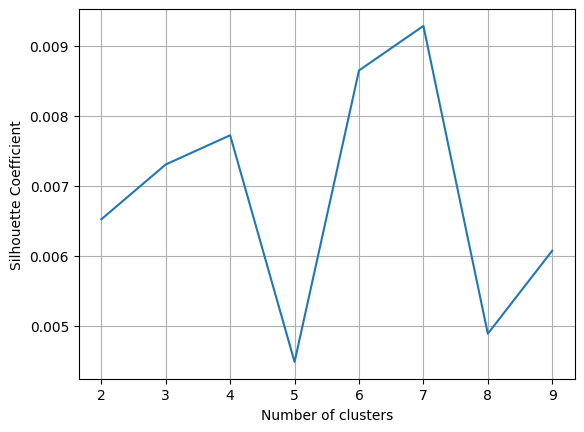

In [ ]:
# silhoutte score to find optimal number of scores
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(reduced_vector)
  silhouette_avg.append(silhouette_score(reduced_vector, km.labels_))

# plot the results
plt.plot(range(2,10), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

The highest Silhouette score is obtained for 7 clusters.

Building 7 clusters using the k-means clustering algorithm.

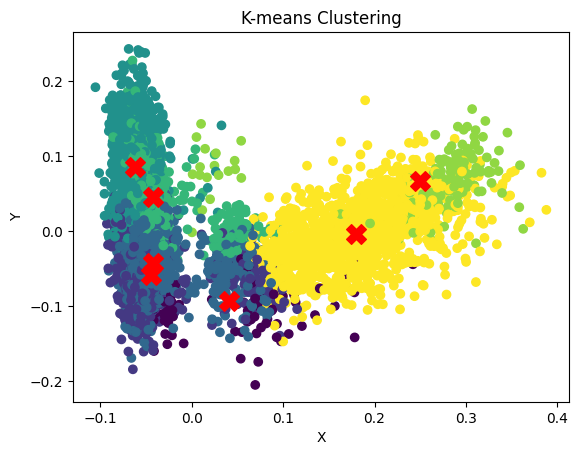

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Sample data points (replace with your own data)
data = reduced_vector

# Fit the data to K-means model
k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the data points and clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()


In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(reduced_vector, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6983.854008430812, 0.004405807878911185)


In [ ]:
netflix_df['kmeans_cluster'] = kmeans.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
1763,Movie,Dilan 1991,"Fajar Bustomi, Pidi Baiq","Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...",Indonesia,TV-14,"Dramas, International Movies, Romantic Movies",Dilan's involvement in the motorbike gang impe...,3
4085,TV Show,Mighty Little Bheem: Festival of Colors,,"Samruddhi Shukla, Aranya Kaur, Rajesh Kava, Ni...",India,TV-Y,"Kids' TV, TV Comedies",From surprising stage performances to spraying...,6
3543,Movie,Last Night,Massy Tadjedin,"Keira Knightley, Sam Worthington, Guillaume Ca...","United States, France",R,"Dramas, Independent Movies, Romantic Movies","During an evening apart, married couple Joanna...",3
3345,Movie,Kevin Hart: Seriously Funny,Shannon Hartman,Kevin Hart,United States,TV-MA,Stand-Up Comedy,"With his unique hip-hop style delivery, Africa...",2
7432,Movie,Virsa,Pankaj Batra,"Arya Babbar, Kanwaljeet Singh, Gulshan Grover,...","India, Pakistan",TV-14,"Dramas, International Movies, Music & Musicals",A man is disheartened when he visits his well-...,3


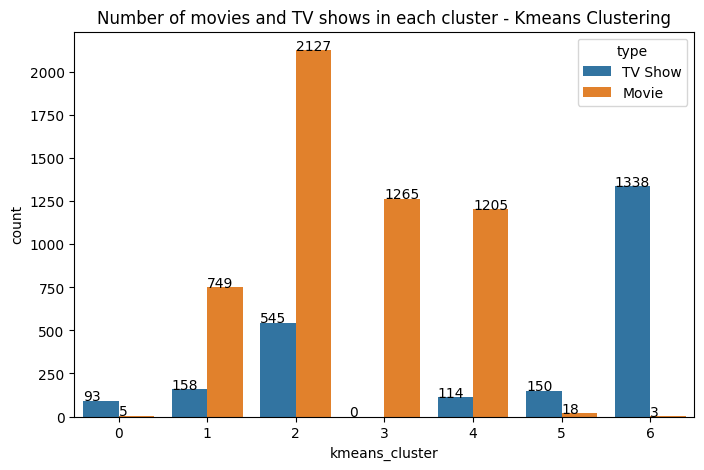

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### ML Model - 2

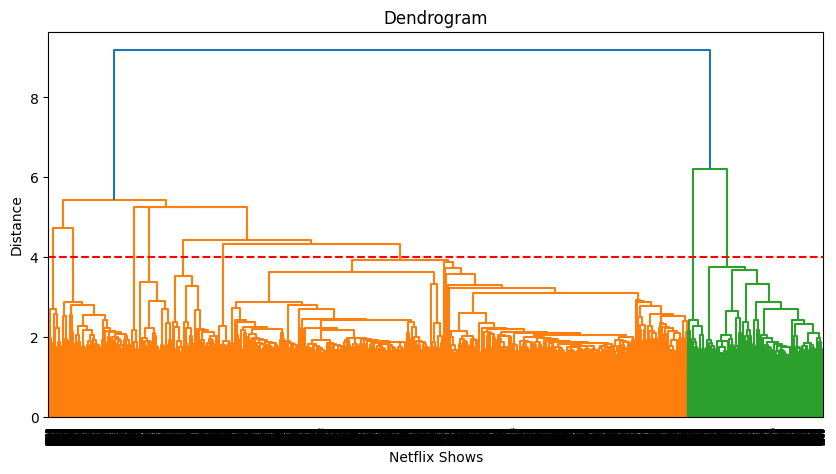

In [ ]:
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(reduced_vector, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(reduced_vector)

array([1, 0, 0, ..., 3, 0, 3])

In [ ]:
# Adding a hierarchical cluster number attribute
netflix_df['hierarchical_cluster'] = hierarchical.labels_


netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
2380,TV Show,Geronimo Stilton,Guy Vasilovich,"Brian Drummond, Erin Mathews, Richard Ian Cox,...","Italy, Canada, France",TV-Y,"Kids' TV, TV Comedies",With the help of brainy and adventurous sideki...,1
1675,Movie,Death to 2020,"Al Campbell, Alice Mathias","Samuel L. Jackson, Hugh Grant, Lisa Kudrow, Ku...",United States,TV-MA,Comedies,"As the year we all want to end finally does, t...",0
2433,Movie,Girls With Balls,Olivier Afonso,"Victor Artus Solaro, Manon Azem, Louise Blachè...","France, Belgium",TV-MA,"Comedies, Horror Movies, International Movies",Stranded in the woods and eyeballed by twisted...,0
1635,Movie,David Brent: Life on the Road,Ricky Gervais,"Ricky Gervais, Doc Brown, Tom Basden, Jo Hartl...","United Kingdom, United States",TV-MA,"Comedies, International Movies","With ""The Office"" long in the past, middling s...",0
2518,Movie,Grandmother's Farm,Ahmed Zein,"Saeed Al-Sheryani, Yaser Alneyadi, Khaled Al-N...",United Arab Emirates,TV-14,"Comedies, Horror Movies, International Movies",A guys' getaway to an isolated farm in the des...,6


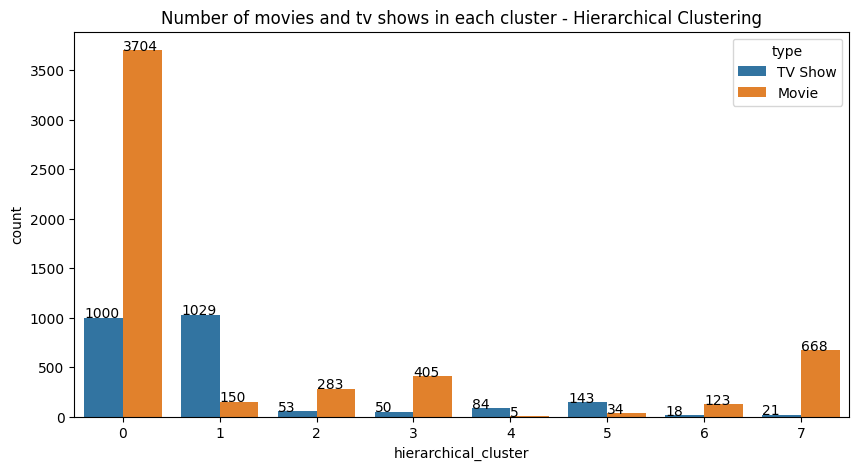

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 8 clusters using the Agglomerative (hierarchical) clustering algorithm.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

There were approximately 7787 records and 12 attributes in the dataset.
We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
The attributes were chosen as the basis for the clustering of the data: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
5000 attributes in total were created by TFIDF vectorization.
The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA). Because 3000 components were able to account for more than 80% of the variance, the total number of components was limited to 3000.

Utilizing the K-Means Clustering algorithm, we first constructed clusters, and the optimal number of clusters was determined to be 7. The elbow method and Silhouette score analysis were used to get this.
The Agglomerative clustering algorithm was then used to create clusters, and the optimal number of clusters was determined to be 8. This was obtained after visualizing the dendrogram.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***